In [1]:
import pandas as pd

import numpy as np
from pyearth import Earth
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew, skewtest

In [2]:
df = pd.read_csv('train.csv')


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
for i in range(df.shape[1]):
    if df.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(df.iloc[:,i].values))
        df.iloc[:,i] = lbl.transform(list(df.iloc[:,i].values))

In [6]:
X = df.drop(['Id','SalePrice'], axis=1)
y = df['SalePrice']


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'LotFrontage', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    X_train[col] = X_train[col].fillna(0)
    X_test[col] = X_test[col].fillna(0)

C:\Users\Saurabh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Saurabh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['1stFlrSF'] + X_test['2ndFlrSF']        


C:\Users\Saurabh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Saurabh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


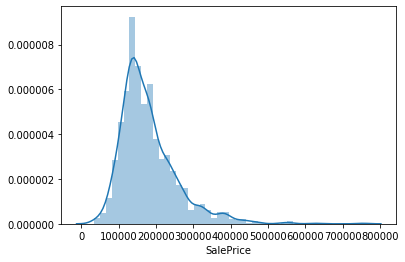

In [10]:
ax = sns.distplot(y_train)
plt.show()

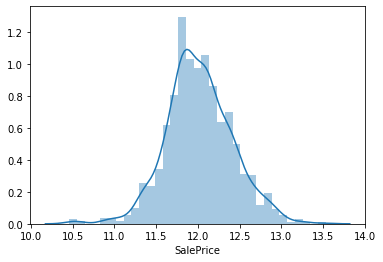

In [11]:
y_train = np.log(y_train)
ax = sns.distplot(y_train)
plt.show()


In [12]:
model = Earth()

model = Earth(max_degree=2, penalty=1.0, minspan_alpha = 0.01, endspan_alpha = 0.01, endspan=5) #2nd degree formula is necessary to see interactions, penalty and alpha values for making model simple

model.fit(X_train, y_train)
model.score(X_train, y_train)

C:\Users\Saurabh\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Saurabh\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


0.921960359846551

In [13]:
print(model.trace())
print(model.summary())

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.157352  1      0.158  0.000  0.000  
1     0       79   367   0.052122  3      0.052  0.669  0.667  
2     0       16   -1    0.031894  4      0.032  0.797  0.796  
3     2       18   -1    0.027661  5      0.028  0.824  0.822  
4     0       17   -1    0.023624  6      0.024  0.850  0.848  
5     2       3    20    0.020889  8      0.021  0.867  0.865  
6     2       36   629   0.019285  10     0.020  0.877  0.875  
7     3       60   -1    0.017802  11     0.018  0.887  0.884  
8     3       78   -1    0.017069  12     0.018  0.892  0.888  
9     1       43   1066  0.016420  14     0.017  0.896  0.892  
10    2       66   984   0.015875  16     0.017  0.899  0.895  
11    0       56   -1    0.015343  17     0.016  0.902  0.898  
12    3       39   -1    0.